In [1]:
import numpy as np
np.set_printoptions(suppress=True)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow.keras.layers import Dense, LSTM
tfd = tfp.distributions

In [45]:
def squared_dist(x): 
    """Efficiently computes the squared pairwise distance between the element of the vector x."""
    expanded_a = tf.expand_dims(x, 1)
    expanded_b = tf.expand_dims(x, 0)
    distances = tf.reduce_sum(tf.math.squared_difference(expanded_a, expanded_b), 2)
    return distances

def RBF(dist, amplitude, length_scale):
    """Computes the radial basis function kernel given a distance matrix and two parameters."""
    return (amplitude**2) * tf.math.exp(-1. / (2 * length_scale**2) * dist)

def GP(mean, cov_matrix, n_samples=1):
    """Draw n_samples from a GP given mean and cov_matrix."""
    return tfp.distributions.MultivariateNormalTriL(loc=mean, scale_tril=cov_matrix).sample(n_samples)

def prior_length_scale(lower=0.1, upper=10.):
    return np.random.default_rng().uniform(lower, upper)

In [42]:
T = 1000
dist = squared_dist(np.linspace(0, 1, T)[:, np.newaxis].astype(np.float32))
length_scale = prior_length_scale()
amplitude = 0.1
cov_matrix = RBF(dist, amplitude, length_scale)
theta_mean = np.array([1] * T).astype(np.float32)

In [43]:
sample = GP(mean=theta_mean, cov_matrix=cov_matrix, n_samples=100).numpy()

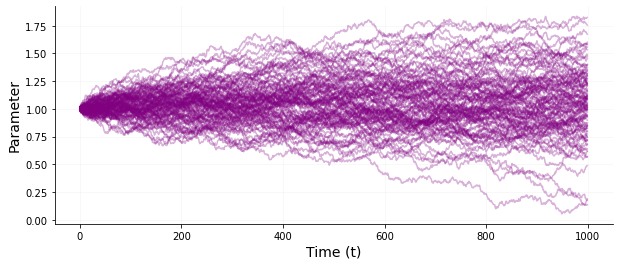

In [44]:
f, ax = plt.subplots(1, 1, figsize=(10, 4))
axarr = ax.plot(sample.T, color='purple', alpha=0.3)
sns.despine(ax=ax)
ax.set_xlabel('Time (t)', fontsize=14)
ax.set_ylabel('Parameter', fontsize=14)
ax.grid(alpha=0.1)